In [2]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import json as js
import ast as ast
import re
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Carga el archivo JSON en un DataFrame
df_reviews= pd.read_json('/Users/carolina/Desktop/Data/Henry - Data Science/M7/Proyecto Individual 1/reviews_modificado.json',lines=True)
df_reviews


,review
0,simple yet with great replayability in my opin...
1,its unique and worth a playthrough
2,great atmosphere the gunplay can be a bit chun...
3,i know what you think when you see this title ...
4,for a simple its actually not all that simple ...
...,...
59262,a must have classic from steam definitely wort...
59263,this game is a perfect remake of the original ...
59264,had so much fun plaing this and collecting res...
59265,d


In [4]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para usar VADER y mapear los sentimientos
def obtener_sentimiento_vader(texto):
    analisis = analyzer.polarity_scores(texto)
    puntuacion = analisis['compound']  # Obtenemos la puntuación compuesta

    # Clasificación según la puntuación
    if puntuacion <= -0.05:
        return 0  # Malo
    elif -0.05 < puntuacion < 0.05:
        return 1  # Neutral
    else:
        return 2  # Positivo

# Aplicar la nueva función a la columna de reviews
df_reviews['sentiment_analysis'] = df_reviews['review'].apply(obtener_sentimiento_vader)

# Verifica el resultado
print(df_reviews[['review', 'sentiment_analysis']].head())

                                              review  sentiment_analysis
0  simple yet with great replayability in my opin...                   2
1                 its unique and worth a playthrough                   2
2  great atmosphere the gunplay can be a bit chun...                   2
3  i know what you think when you see this title ...                   2
4  for a simple its actually not all that simple ...                   2


In [34]:
print(df_reviews[['review', 'sentiment_analysis']].sample(10))  # Muestra 10 filas aleatorias

                                                  review  sentiment_analysis
22211  i was planning on going to a hospital to get s...                   0
6329   this game is amazing and i recommend it to any...                   2
16714                  a great game to play with friends                   2
47001                                 an incredible game                   1
9537   this game will never be forgotten it will be e...                   2
2507                         very good game 10 out of 10                   2
52532                                     best game ever                   2
13357  i highly recomend this game for people who wou...                   2
5810   not as great as 2 but still an amazing game pl...                   0
16454  its ok i guess it could just go on a website o...                   2


In [36]:
df_reviews

,review,sentiment_analysis
0,simple yet with great replayability in my opin...,2
1,its unique and worth a playthrough,2
2,great atmosphere the gunplay can be a bit chun...,2
3,i know what you think when you see this title ...,2
4,for a simple its actually not all that simple ...,2
...,...,...
59262,a must have classic from steam definitely wort...,2
59263,this game is a perfect remake of the original ...,2
59264,had so much fun plaing this and collecting res...,2
59265,d,1


/var/folders/mz/q_bk1n_55k70r74tttm3ps0c0000gn/T/ipykernel_913/767550065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='sentiment_analysis', palette='viridis')


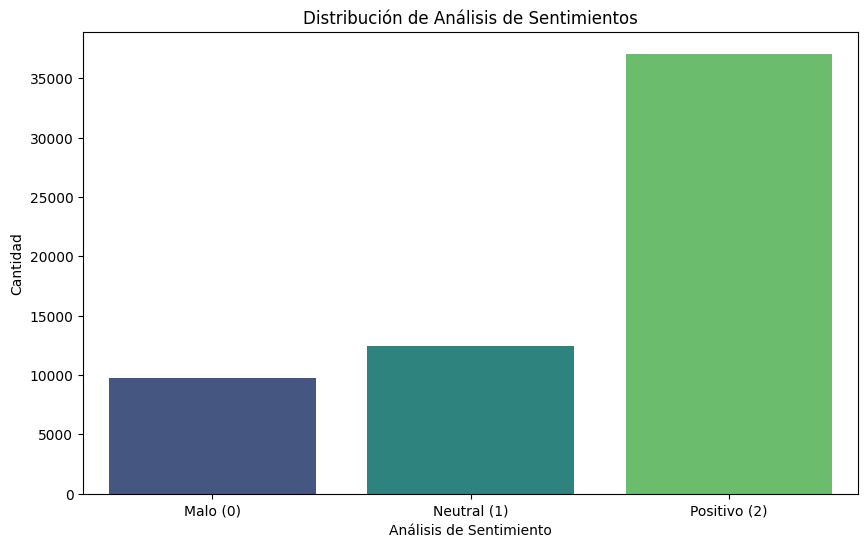

In [35]:
# Crear un gráfico de conteo para la distribución de sentimientos
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.countplot(data=df_reviews, x='sentiment_analysis', palette='viridis')

# Agregar título y etiquetas
plt.title('Distribución de Análisis de Sentimientos')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(ticks=[0, 1, 2], labels=['Malo (0)', 'Neutral (1)', 'Positivo (2)'])

# Mostrar la gráfica
plt.show()

In [1]:
df_reviews

NameError: name 'df_reviews' is not defined

In [3]:
# Carga el archivo JSON en un DataFrame
df_reviews = pd.read_parquet('/Users/carolina/Desktop/Data/Henry - Data Science/M7/Proyecto Individual 1/df_reviews.parquet')

In [4]:
df_reviews

,user_id,posted_year,recommend,review
0,76561197970982479,2011.0,True,simple yet with great replayability in my opin...
1,76561197970982479,2011.0,True,its unique and worth a playthrough
2,76561197970982479,2011.0,True,great atmosphere the gunplay can be a bit chun...
3,js41637,2014.0,True,i know what you think when you see this title ...
4,js41637,2013.0,True,for a simple its actually not all that simple ...
...,...,...,...,...
47548,wayfeng,2015.0,True,its funnnnnnnn
47549,76561198251004808,2015.0,True,awesome fantasy game if you dont mind the grap...
47550,72947282842,2015.0,True,prettyy mad game
47551,ApxLGhost,2015.0,True,amazing game 1010


In [5]:


# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para usar VADER y mapear los sentimientos
def obtener_sentimiento_vader(texto):
    analisis = analyzer.polarity_scores(texto)
    puntuacion = analisis['compound']  # Obtenemos la puntuación compuesta

    # Clasificación según la puntuación
    if puntuacion <= -0.05:
        return 0  # Malo
    elif -0.05 < puntuacion < 0.05:
        return 1  # Neutral
    else:
        return 2  # Positivo

# Aplicar la nueva función a la columna de reviews
df_reviews['sentiment_analysis'] = df_reviews['review'].apply(obtener_sentimiento_vader)

# Verifica el resultado
print(df_reviews[['review', 'sentiment_analysis']].head())

                                              review  sentiment_analysis
0  simple yet with great replayability in my opin...                   2
1                 its unique and worth a playthrough                   2
2  great atmosphere the gunplay can be a bit chun...                   2
3  i know what you think when you see this title ...                   2
4  for a simple its actually not all that simple ...                   2


/var/folders/mz/q_bk1n_55k70r74tttm3ps0c0000gn/T/ipykernel_1110/1079696916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='sentiment_analysis', palette='viridis')


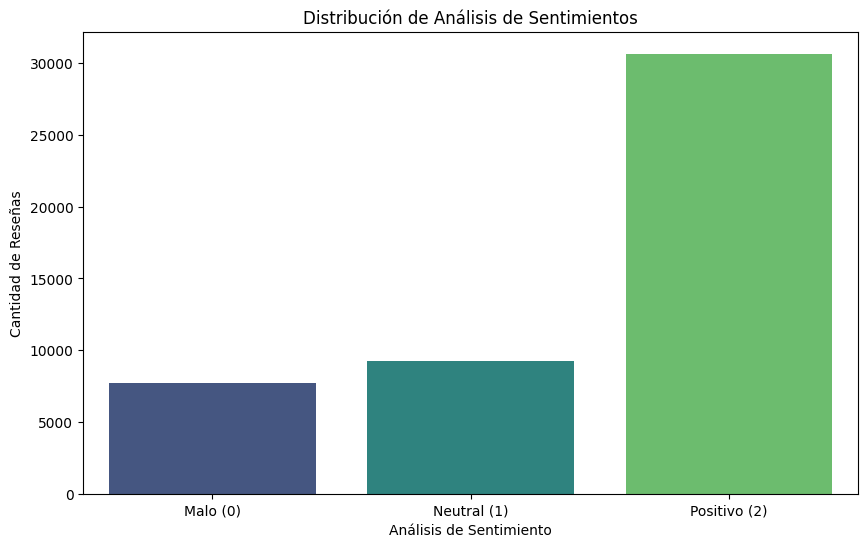

In [6]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.countplot(data=df_reviews, x='sentiment_analysis', palette='viridis')

# Agregar título y etiquetas
plt.title('Distribución de Análisis de Sentimientos')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(ticks=[0, 1, 2], labels=['Malo (0)', 'Neutral (1)', 'Positivo (2)'])

# Mostrar la gráfica
plt.show()

In [7]:
df_reviews

,user_id,posted_year,recommend,review,sentiment_analysis
0,76561197970982479,2011.0,True,simple yet with great replayability in my opin...,2
1,76561197970982479,2011.0,True,its unique and worth a playthrough,2
2,76561197970982479,2011.0,True,great atmosphere the gunplay can be a bit chun...,2
3,js41637,2014.0,True,i know what you think when you see this title ...,2
4,js41637,2013.0,True,for a simple its actually not all that simple ...,2
...,...,...,...,...,...
47548,wayfeng,2015.0,True,its funnnnnnnn,1
47549,76561198251004808,2015.0,True,awesome fantasy game if you dont mind the grap...,2
47550,72947282842,2015.0,True,prettyy mad game,0
47551,ApxLGhost,2015.0,True,amazing game 1010,2


In [8]:
df_reviews.to_parquet('df_reviews_sentiment.parquet', engine='pyarrow', index=False)